In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [2]:
out = pathlib.Path("../jz_out")

In [3]:
runs_e01 = {
    "pair_diff": out / "gains/constant/e-01",
    "no_atm": out / "gains/constant/noatm/e-01",
    "noatm_nohwp": out / "gains/constant/noatm_nohwp/e-01",
    "iqu_fit": out / "gains/constant/iqu/e-01",
}
runs_e02 = {
    "pair_diff": out / "gains/constant/e-02",
    "no_atm": out / "gains/constant/noatm/e-02",
    "nohwp": out / "gains/constant/nohwp/e-02",
    "noatm_nohwp": out / "gains/constant/noatm_nohwp/e-02",
    "iqu_fit": out / "gains/constant/iqu/e-02",
}
runs_e02_random = {
    "pair_diff": out / "gains/random/e-02",
    # "no_atm": out / "gains/random/noatm/e-02",
    # "nohwp": out / "gains/random/nohwp/e-02",
    # "noatm_nohwp": out / "gains/random/noatm_nohwp/e-02",
    "iqu_fit": out / "gains/random/iqu/e-02",
}

In [4]:
def get_cells(run: pathlib.Path):
    cldir = run / "spectra"
    return {
        "full": np.load(cldir / "full_cl_more_hits.npz"),
        "noise": np.load(cldir / "noise_cl_more_hits.npz"),
    }

In [5]:
cells_e01 = {k: get_cells(v) for k, v in runs_e01.items()}
cells_e02 = {k: get_cells(v) for k, v in runs_e02.items()}
cells_e02_random = {k: get_cells(v) for k, v in runs_e02_random.items()}

In [6]:
cells_baseline = {
    "full": np.load(out / "baseline/spectra/full_cl_more_hits.npz"),
    "noise": np.load(out / "baseline/spectra/noise_cl_more_hits.npz"),
}

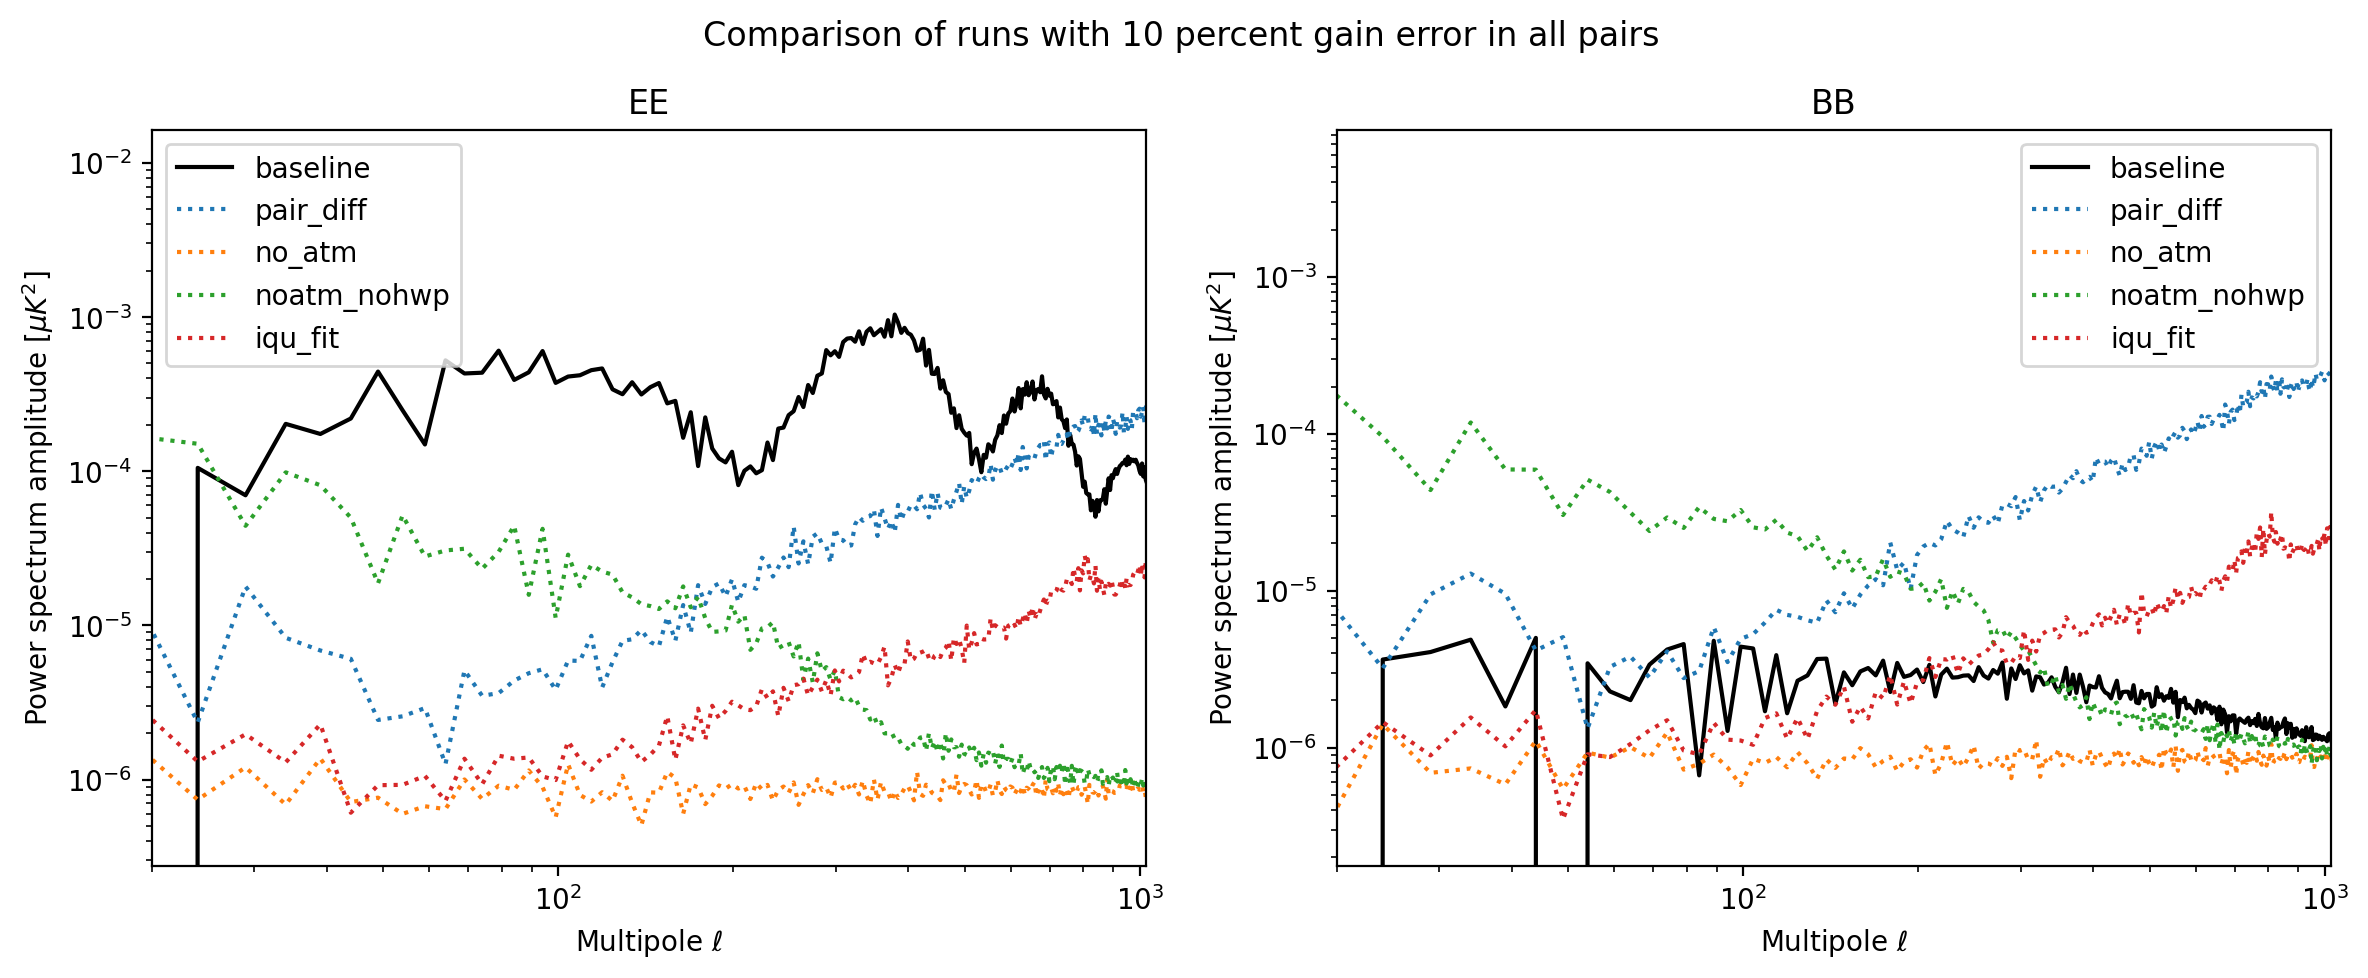

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Comparison of runs with 10 percent gain error in all pairs")
axs[0].set_title("EE")
axs[1].set_title("BB")
ell_arr = cells_baseline["full"]["ell_arr"]
for ax, idx in zip(axs, [0, 3]):
    ax.plot(ell_arr, cells_baseline["full"]["cl_22"][idx], "k", label="baseline")
    # ax.plot(ell_arr, cells_baseline["noise"]["cl_22"][idx], "k")
for k in cells_e01:
    for ax, idx in zip(axs, [0, 3]):
        # line = ax.plot(ell_arr, cells_e01[k]["full"]["cl_22"][idx], ls="solid", label=k)
        ax.plot(
            ell_arr,
            cells_e01[k]["noise"]["cl_22"][idx],
            ls="dotted",
            label=k,
            # color=line[-1].get_color(),
        )
for ax in axs.flat:
    ax.loglog()
    ax.set_xlim(left=20, right=1024)
    ax.set_xlabel(r"Multipole $\ell$")
    ax.set_ylabel(r"Power spectrum amplitude [$\mu K^2$]")
    ax.legend()
fig.tight_layout()
plt.show()

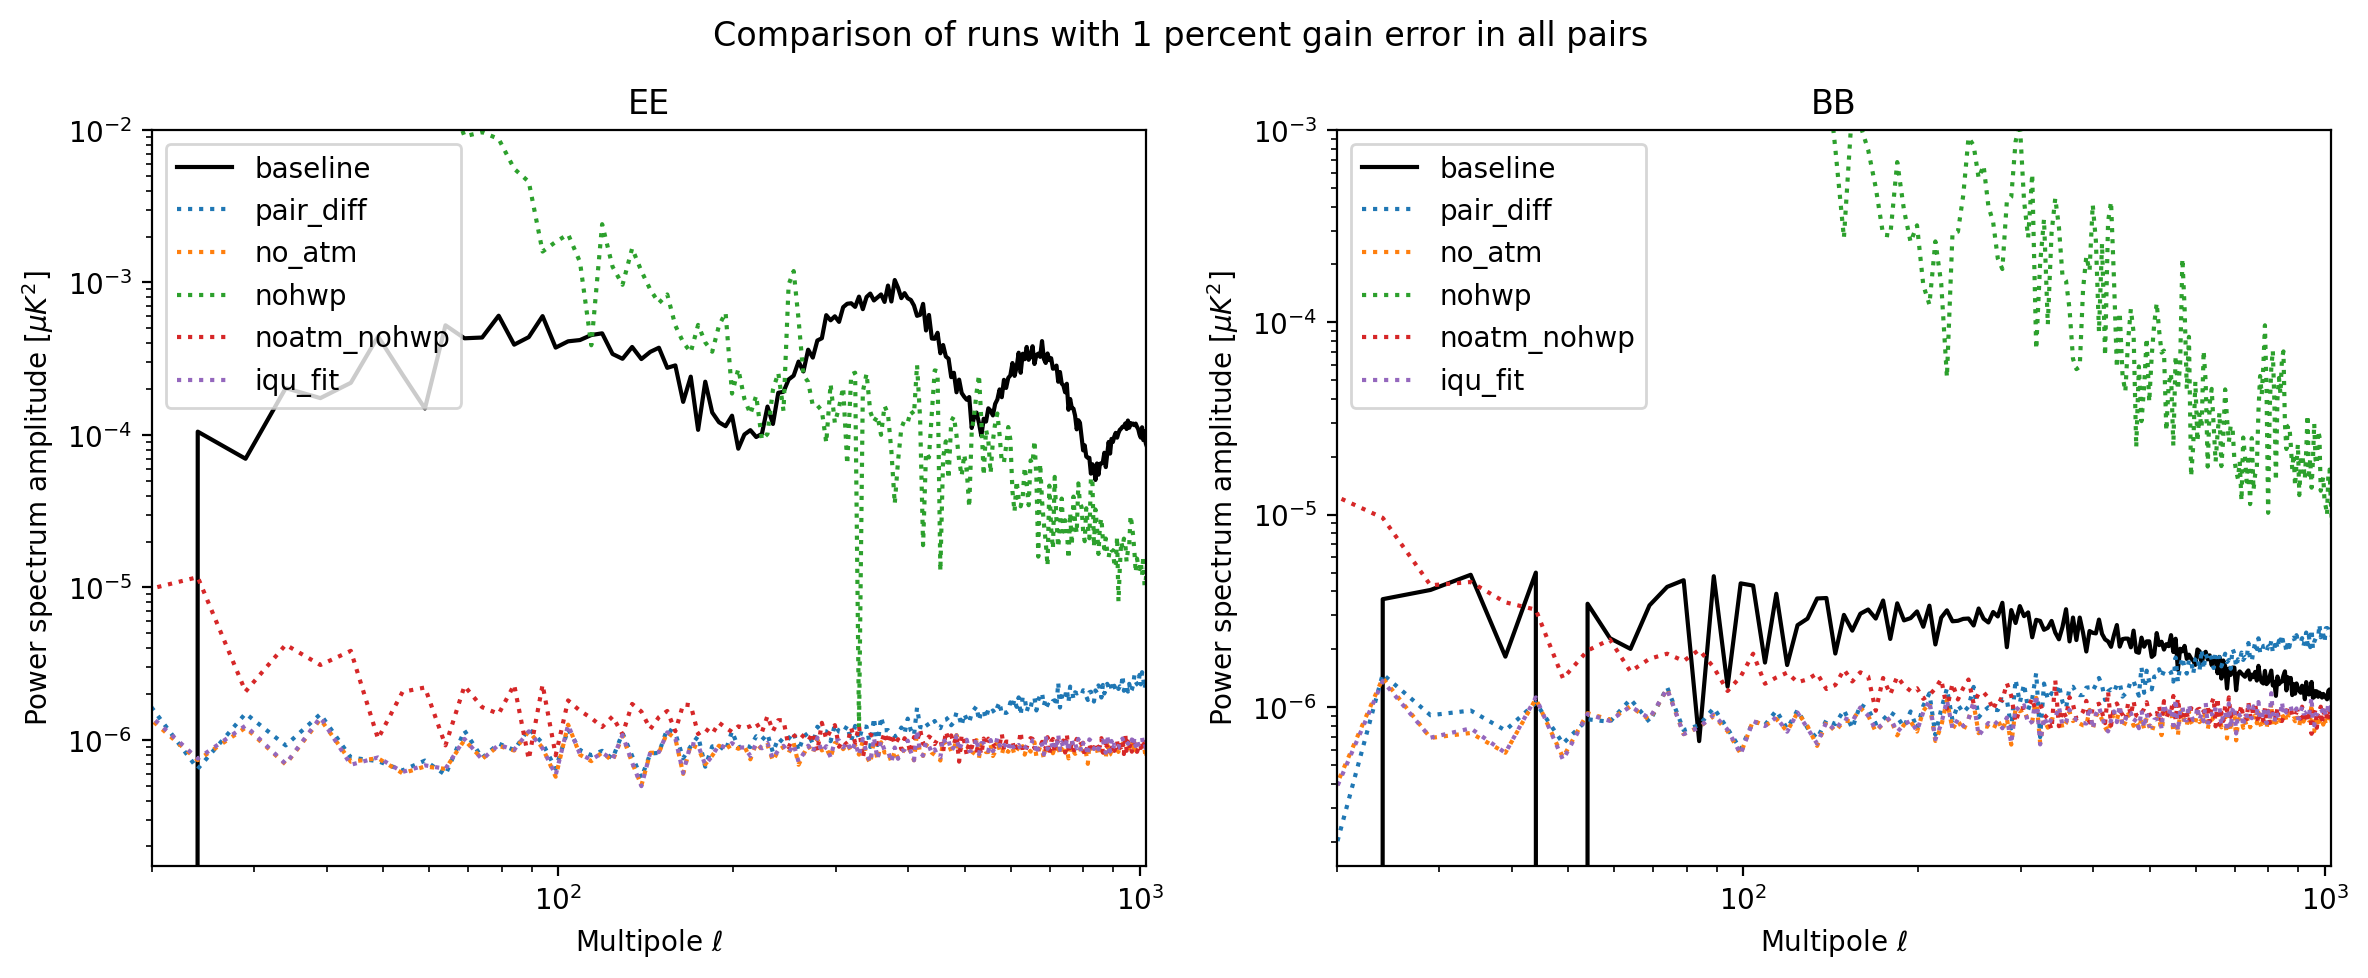

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Comparison of runs with 1 percent gain error in all pairs")
axs[0].set_title("EE")
axs[1].set_title("BB")
ell_arr = cells_baseline["full"]["ell_arr"]
for ax, idx in zip(axs, [0, 3]):
    ax.plot(ell_arr, cells_baseline["full"]["cl_22"][idx], "k", label="baseline")
    # ax.plot(ell_arr, cells_baseline["noise"]["cl_22"][idx], "k")
for k in cells_e02:
    for ax, idx in zip(axs, [0, 3]):
        # line = ax.plot(ell_arr, cells_e02[k]["full"]["cl_22"][idx], ls="solid", label=k)
        ax.plot(
            ell_arr,
            cells_e02[k]["noise"]["cl_22"][idx],
            ls="dotted",
            label=k,
            # color=line[-1].get_color(),
        )
for ax in axs.flat:
    ax.loglog()
    ax.set_xlim(left=20, right=1024)
    ax.set_xlabel(r"Multipole $\ell$")
    ax.set_ylabel(r"Power spectrum amplitude [$\mu K^2$]")
    ax.legend()
axs[0].set_ylim(bottom=1.5e-7, top=1e-2)
axs[1].set_ylim(bottom=1.5e-7, top=1e-3)
fig.tight_layout()
plt.show()

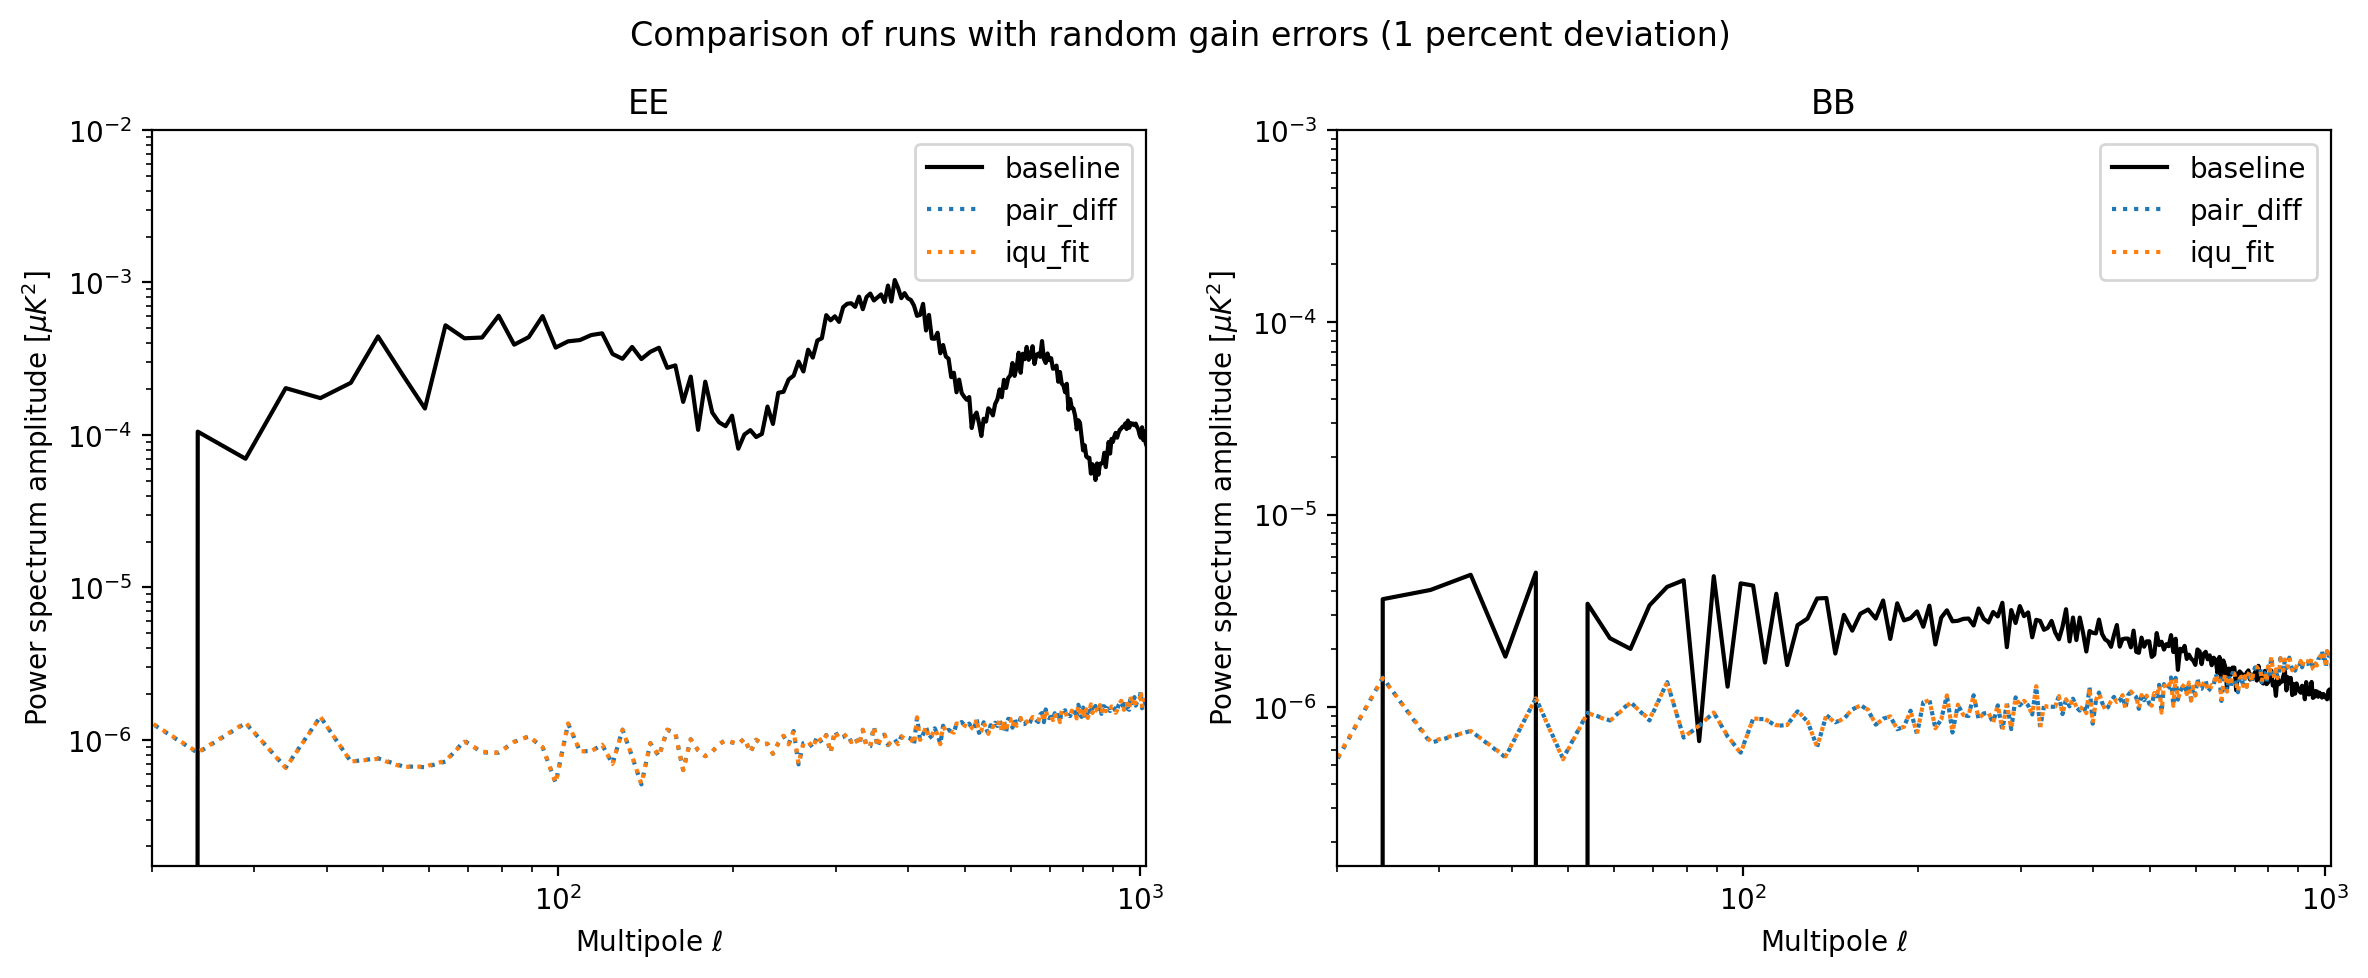

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Comparison of runs with random gain errors (1 percent deviation)")
axs[0].set_title("EE")
axs[1].set_title("BB")
ell_arr = cells_baseline["full"]["ell_arr"]
for ax, idx in zip(axs, [0, 3]):
    ax.plot(ell_arr, cells_baseline["full"]["cl_22"][idx], "k", label="baseline")
    # ax.plot(ell_arr, cells_baseline["noise"]["cl_22"][idx], "k")
for k in cells_e02_random:
    for ax, idx in zip(axs, [0, 3]):
        # line = ax.plot(ell_arr, cells_e02_random[k]["full"]["cl_22"][idx], ls="solid", label=k)
        ax.plot(
            ell_arr,
            cells_e02_random[k]["noise"]["cl_22"][idx],
            ls="dotted",
            label=k,
            # color=line[-1].get_color(),
        )
for ax in axs.flat:
    ax.loglog()
    ax.set_xlim(left=20, right=1024)
    ax.set_xlabel(r"Multipole $\ell$")
    ax.set_ylabel(r"Power spectrum amplitude [$\mu K^2$]")
    ax.legend()
axs[0].set_ylim(bottom=1.5e-7, top=1e-2)
axs[1].set_ylim(bottom=1.5e-7, top=1e-3)
fig.tight_layout()
plt.show()

### Plots for poster

In [10]:
import camb
import healpy as hp
# from cycler import cycler
# import seaborn as sns

In [11]:
# Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
# This function sets up with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0.1)
pars.WantTensors = True
pars.set_for_lmax(4000, lens_potential_accuracy=2);

In [12]:
# Calculate results for these parameters
results = camb.get_results(pars)

In [13]:
# Get dictionary of CAMB power spectra
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers:
    print(name, powers[name].shape)

total (4051, 4)
unlensed_scalar (4051, 4)
unlensed_total (4051, 4)
lensed_scalar (4051, 4)
tensor (4051, 4)
lens_potential (4051, 3)


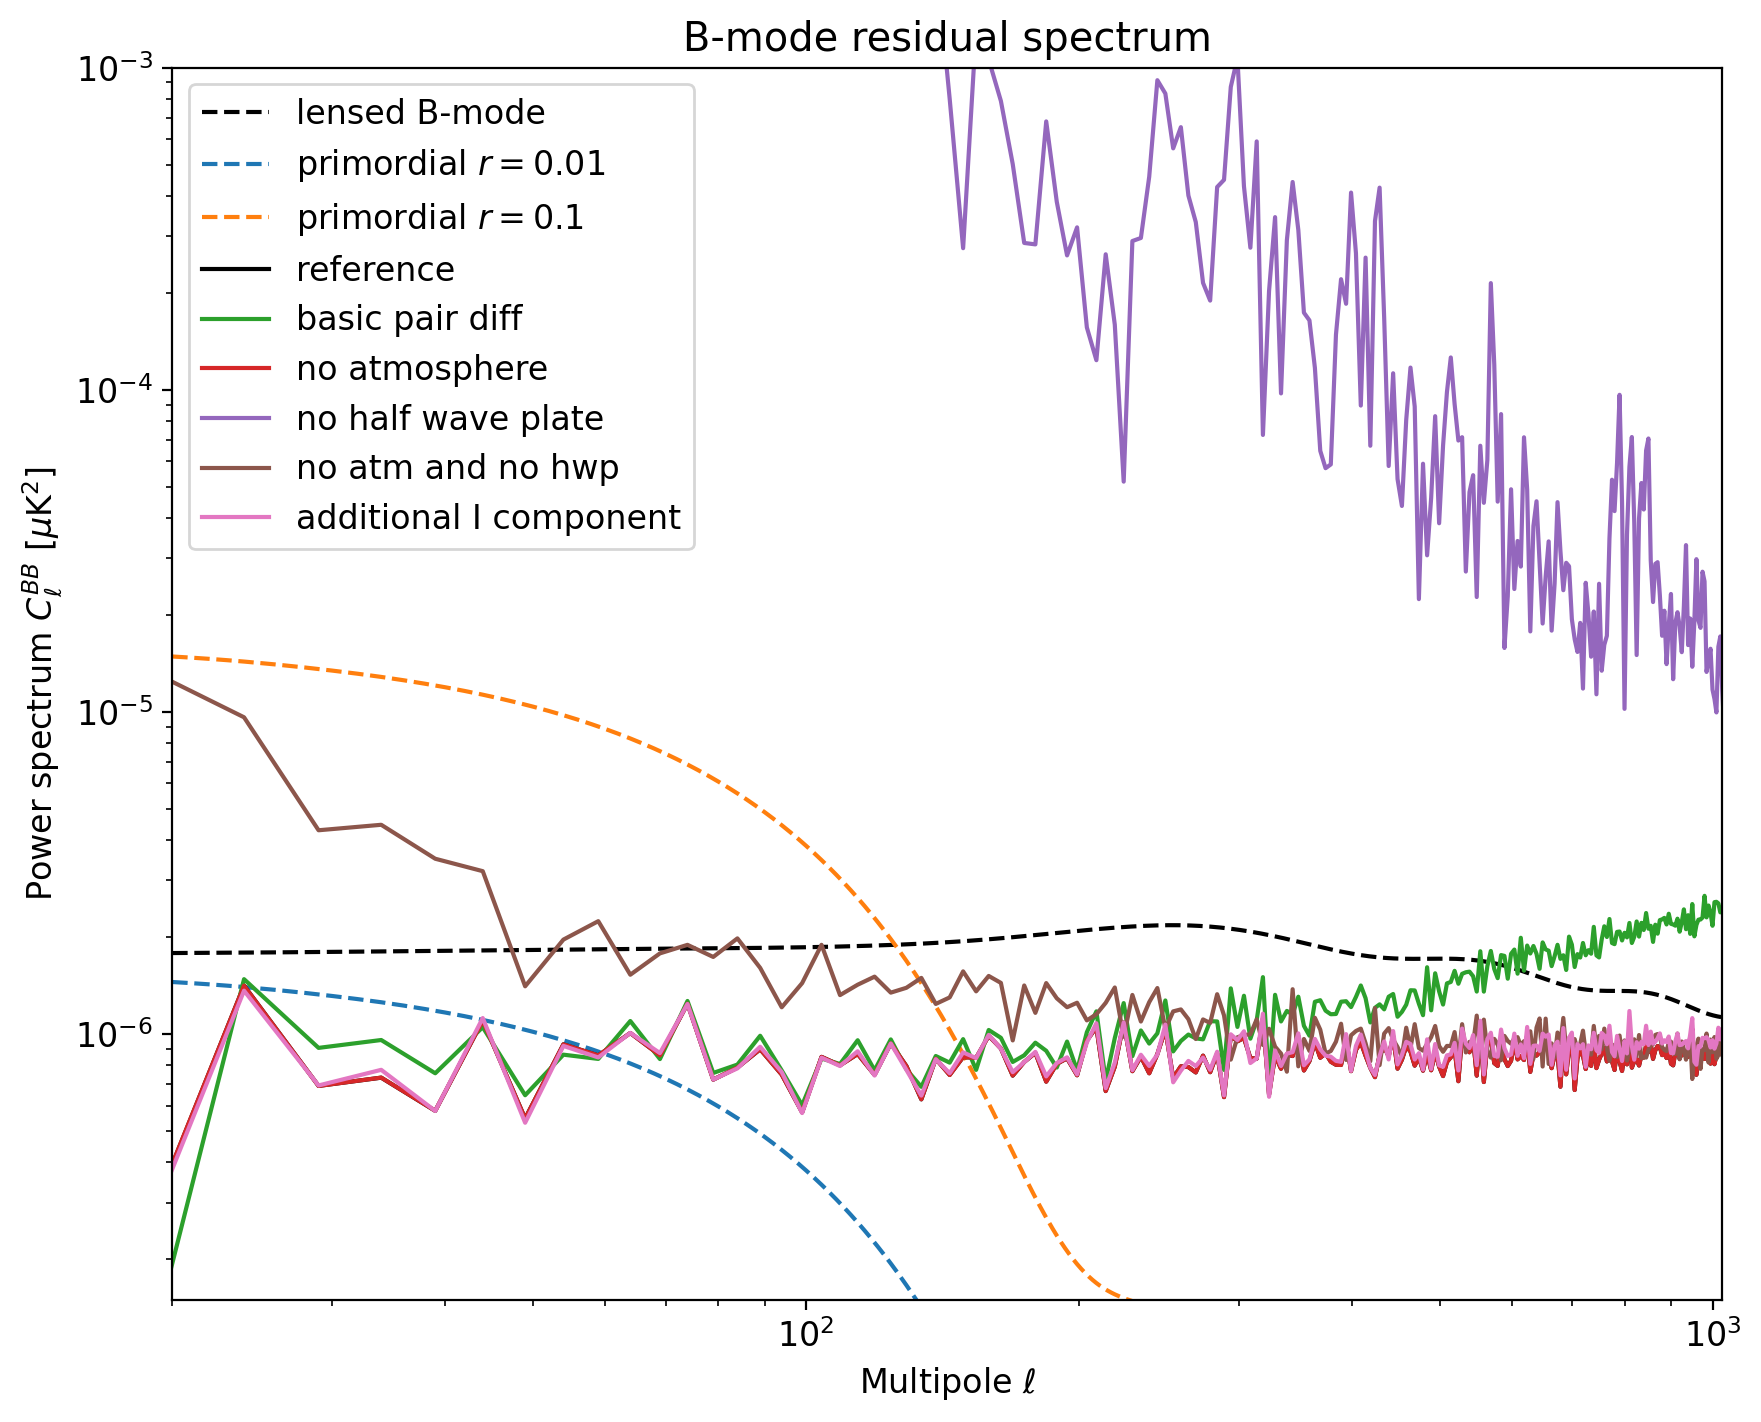

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams["font.size"] = 12
# Set tick font size
# for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#     label.set_fontsize(14)
ax.set_title("B-mode residual spectrum")
lmin = 20
lmax = 1024

# Planck beam @ 100 GHz
fwhm = 9.69  # arcmin
bl = hp.sphtfunc.gauss_beam(fwhm * np.pi / 180 / 60, lmax=lmax)

# Theory spectra
tf = camb.get_transfer_functions(pars)
rs = [
    0.0,
    # 1e-3,
    1e-2,
    1e-1,
]
for r in rs:
    inflation_params = camb.initialpower.InitialPowerLaw()
    inflation_params.set_params(ns=0.96, r=r)
    tf.power_spectra_from_transfer(
        inflation_params
    )  # warning OK here, not changing scalars
    ell = np.arange(lmin, lmax + 1)
    if r == 0.0:
        cl = tf.get_total_cls(lmax, CMB_unit="muK")
        ax.loglog(
            ell,
            cl[lmin:, 2] * 2 * np.pi / (ell * (ell + 1)) / bl[lmin:],
            linestyle="dashed",
            color="k",
        )
    else:
        tcl = tf.get_tensor_cls(lmax, CMB_unit="muK")
        ax.loglog(
            ell, tcl[lmin:, 2] * 2 * np.pi / (ell * (ell + 1)) / bl[lmin:], linestyle="dashed"
        )

# Reference (baseline)
ax.plot(
    ell_arr,
    cells_baseline["noise"]["cl_22"][3],
    "k",
)

# Add different configurations
for k in cells_e02:
    # print(k)
    ax.plot(
        ell_arr,
        cells_e02[k]["noise"]["cl_22"][3],
        # linewidth=0.8,
        # alpha=0.8,
    )

ax.legend(
    [
        "lensed B-mode",
        # r"prim $r=0.001$",
        r"primordial $r=0.01$",
        r"primordial $r=0.1$",
        "reference",
        "basic pair diff",
        "no atmosphere",
        "no half wave plate",
        "no atm and no hwp",
        "additional I component",
    ]
)

ax.loglog()
ax.set_xlim([lmin, lmax])
ax.set_ylim([1.5e-7, 1e-3])
ax.set_ylabel(r"Power spectrum $C_\ell^{BB}$ [$\mu{\rm K}^2$]")
ax.set_xlabel(r"Multipole $\ell$")
plt.show()